# XOR-gate model

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch

In [3]:
x_train = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]]).float()
y_train = torch.tensor([[0], [1], [1], [0]]).float()

In [4]:
class SigmoidModel:
    def __init__(self):

        # Random
        self.W1 = torch.rand(2, 2, requires_grad=True)
        self.b1 = torch.rand(1, 2, requires_grad=True)
        self.W2 = torch.rand(2, 1, requires_grad=True)
        self.b2 = torch.rand(1, 1, requires_grad=True)

        # Zeros
        # self.W1 = torch.rand(2, 2, requires_grad=True)
        # self.b1 = torch.rand(1, 2, requires_grad=True)
        # self.W2 = torch.rand(2, 1, requires_grad=True)
        # self.b2 = torch.rand(1, 1, requires_grad=True)

        # Inputted values
        # self.W1 = torch.tensor([[10.0, -10.0], [10.0, -10.0]],    requires_grad=True)
        # self.b1 = torch.tensor([[-5.0, 15.0]],                    requires_grad=True)
        # self.W2 = torch.tensor([[10.0], [10.0]],                  requires_grad=True)
        # self.b2 = torch.tensor([[-15.0]],                         requires_grad=True)

    def f1(self, x):
        return torch.sigmoid(torch.Tensor(x) @ self.W1 + self.b1)

    def f2(self, x):
        return torch.sigmoid(torch.Tensor(x) @ self.W2 + self.b2)

    def f(self, x):
        return self.f2(self.f1(x))

    def loss(self, x, y):
        return -torch.mean(torch.multiply(y, torch.log(self.f(x))) + torch.multiply((1-y), torch.log(1-self.f(x))))

In [7]:
model = SigmoidModel()
optimizer = torch.optim.SGD([model.W1, model.W2, model.b1, model.b2], 0.01)

for epoch in range(100_000):
    model.loss(x_train, y_train).backward()
    optimizer.step()
    optimizer.zero_grad()

print("W1 =\t%s\nW2 =\t%s\nb1 =\t%s\nb2 =\t%s\nLoss =\t%s" % (model.W1, model.W2, model.b1, model.b2, model.loss(x_train, y_train)))

W1 =	tensor([[4.4105, 6.4429],
        [4.4088, 6.4327]], requires_grad=True)
W2 =	tensor([[-9.9396],
        [ 9.2631]], requires_grad=True)
b1 =	tensor([[-6.7422, -2.7950]], requires_grad=True)
b2 =	tensor([[-4.2271]], requires_grad=True)
Loss =	tensor(0.0214, grad_fn=<NegBackward0>)


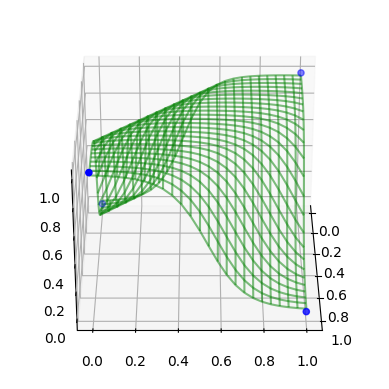

In [8]:
x_grid, y_grid = np.meshgrid(np.linspace(0, 1, 25), np.linspace(0, 1, 25))
z_grid = np.empty([25, 25])

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter3D(x_train[:, 0].squeeze(), x_train[:, 1].squeeze(), y_train[:, 0].squeeze(), marker='o', color='blue')
 
for i in range(0, x_grid.shape[0]):
    for j in range(0, x_grid.shape[1]):
        z_grid[i, j] = model.f([[x_grid[i, j], y_grid[i, j]]])

ax.plot_wireframe(x_grid, y_grid, z_grid, color='green', alpha=0.50)
ax.view_init(30, 0)
plt.show()